In [1]:
import os
import json
import warnings
import matplotlib.pyplot as plt
from itertools import zip_longest
import seaborn as sns
import pandas as pd

warnings.filterwarnings("ignore")

In [2]:
from util import (
    ticker_option, combine_dfs, get_stock_price, 
    prepare_ml_dataset, concatenate_strings, train_model,
    view_shap_value_for_instance
)

In [3]:
use_cache = True

In [4]:
if os.path.exists('price.json') & use_cache:
    # Read the dictionary from the JSON file
    with open('price.json', 'r') as json_file:
        price_dict = json.load(json_file)
else:
    price_dict = {}

In [5]:
len(price_dict)

20

In [6]:
# top 20+ tickers
ticker_list = [
    "MSFT", "AAPL", "NVDA", "AMZN", "META", "GOOGL", "GOOG", "BRK.B", "LLY", "AVGO", "JPM", 
    "XOM", "TSLA", "UNH", "V", "PG", "MA", "COST", "JNJ", "HD", "MRK",
]
df = combine_dfs(ticker_list, price_dict)
df

MSFT
AAPL
NVDA
AMZN
META
GOOGL
GOOG
BRK.B
No options found for BRK.B
LLY
AVGO
JPM
XOM
TSLA
UNH
V
PG
MA
COST
JNJ
HD
MRK


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,exp,days_to_exp,stockPrice,option_ticker
0,AMZN240621P01540000,2022-04-27,1540.0,138.00,114.50,130.50,0.000000,0.000000,1.0,1.0,0.000010,True,REGULAR,USD,put,2024-06-21,785.21,138.17,AMZN
1,AMZN240621P01660000,2022-04-28,1660.0,84.30,145.00,161.00,0.000000,0.000000,3.0,2.0,0.000010,True,REGULAR,USD,put,2024-06-21,784.29,144.60,AMZN
2,AMZN240621C01840000,2022-04-28,1840.0,1223.65,774.00,793.00,0.000000,0.000000,2.0,2.0,0.000000,False,REGULAR,USD,call,2024-06-21,784.43,144.60,AMZN
3,AMZN240621C01740000,2022-04-29,1740.0,998.00,838.00,856.00,0.000000,0.000000,1.0,1.0,0.000000,False,REGULAR,USD,call,2024-06-21,783.18,124.28,AMZN
4,AMZN240621C01640000,2022-04-29,1640.0,1114.45,904.00,922.00,0.000000,0.000000,2.0,2.0,0.000000,False,REGULAR,USD,call,2024-06-21,783.39,124.28,AMZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39971,LLY240816C00850000,2024-06-03,850.0,40.45,40.25,40.95,5.200001,14.751775,465.0,836.0,0.336905,False,REGULAR,USD,call,2024-08-16,73.28,827.32,LLY
39972,LLY240816C00840000,2024-06-03,840.0,46.79,44.55,45.35,8.110001,20.966910,133.0,564.0,0.338370,False,REGULAR,USD,call,2024-08-16,73.29,827.32,LLY
39973,LLY240816C00830000,2024-06-03,830.0,51.05,49.35,50.25,6.059998,13.469654,29.0,551.0,0.341140,False,REGULAR,USD,call,2024-08-16,73.29,827.32,LLY
39974,LLY240816C00900000,2024-06-03,900.0,24.45,23.05,24.10,5.750000,30.748661,9.0,244.0,0.335334,False,REGULAR,USD,call,2024-08-16,73.32,827.32,LLY


In [7]:
# save to json
with open('price.json', 'w') as json_file:
    json.dump(price_dict, json_file, indent=4)

In [8]:
df =  prepare_ml_dataset(df)
df

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice
0,1540.0,0.000000,0.000000,1.0,1.0,0.000010,1,785.21,138.17,0,1,138.00
1,1660.0,0.000000,0.000000,3.0,2.0,0.000010,1,784.29,144.60,0,1,84.30
2,1840.0,0.000000,0.000000,2.0,2.0,0.000000,0,784.43,144.60,1,0,1223.65
3,1740.0,0.000000,0.000000,1.0,1.0,0.000000,0,783.18,124.28,1,0,998.00
4,1640.0,0.000000,0.000000,2.0,2.0,0.000000,0,783.39,124.28,1,0,1114.45
...,...,...,...,...,...,...,...,...,...,...,...,...
22578,850.0,5.200001,14.751775,465.0,836.0,0.336905,0,73.28,827.32,1,0,40.45
22579,840.0,8.110001,20.966910,133.0,564.0,0.338370,0,73.29,827.32,1,0,46.79
22580,830.0,6.059998,13.469654,29.0,551.0,0.341140,0,73.29,827.32,1,0,51.05
22581,900.0,5.750000,30.748661,9.0,244.0,0.335334,0,73.32,827.32,1,0,24.45


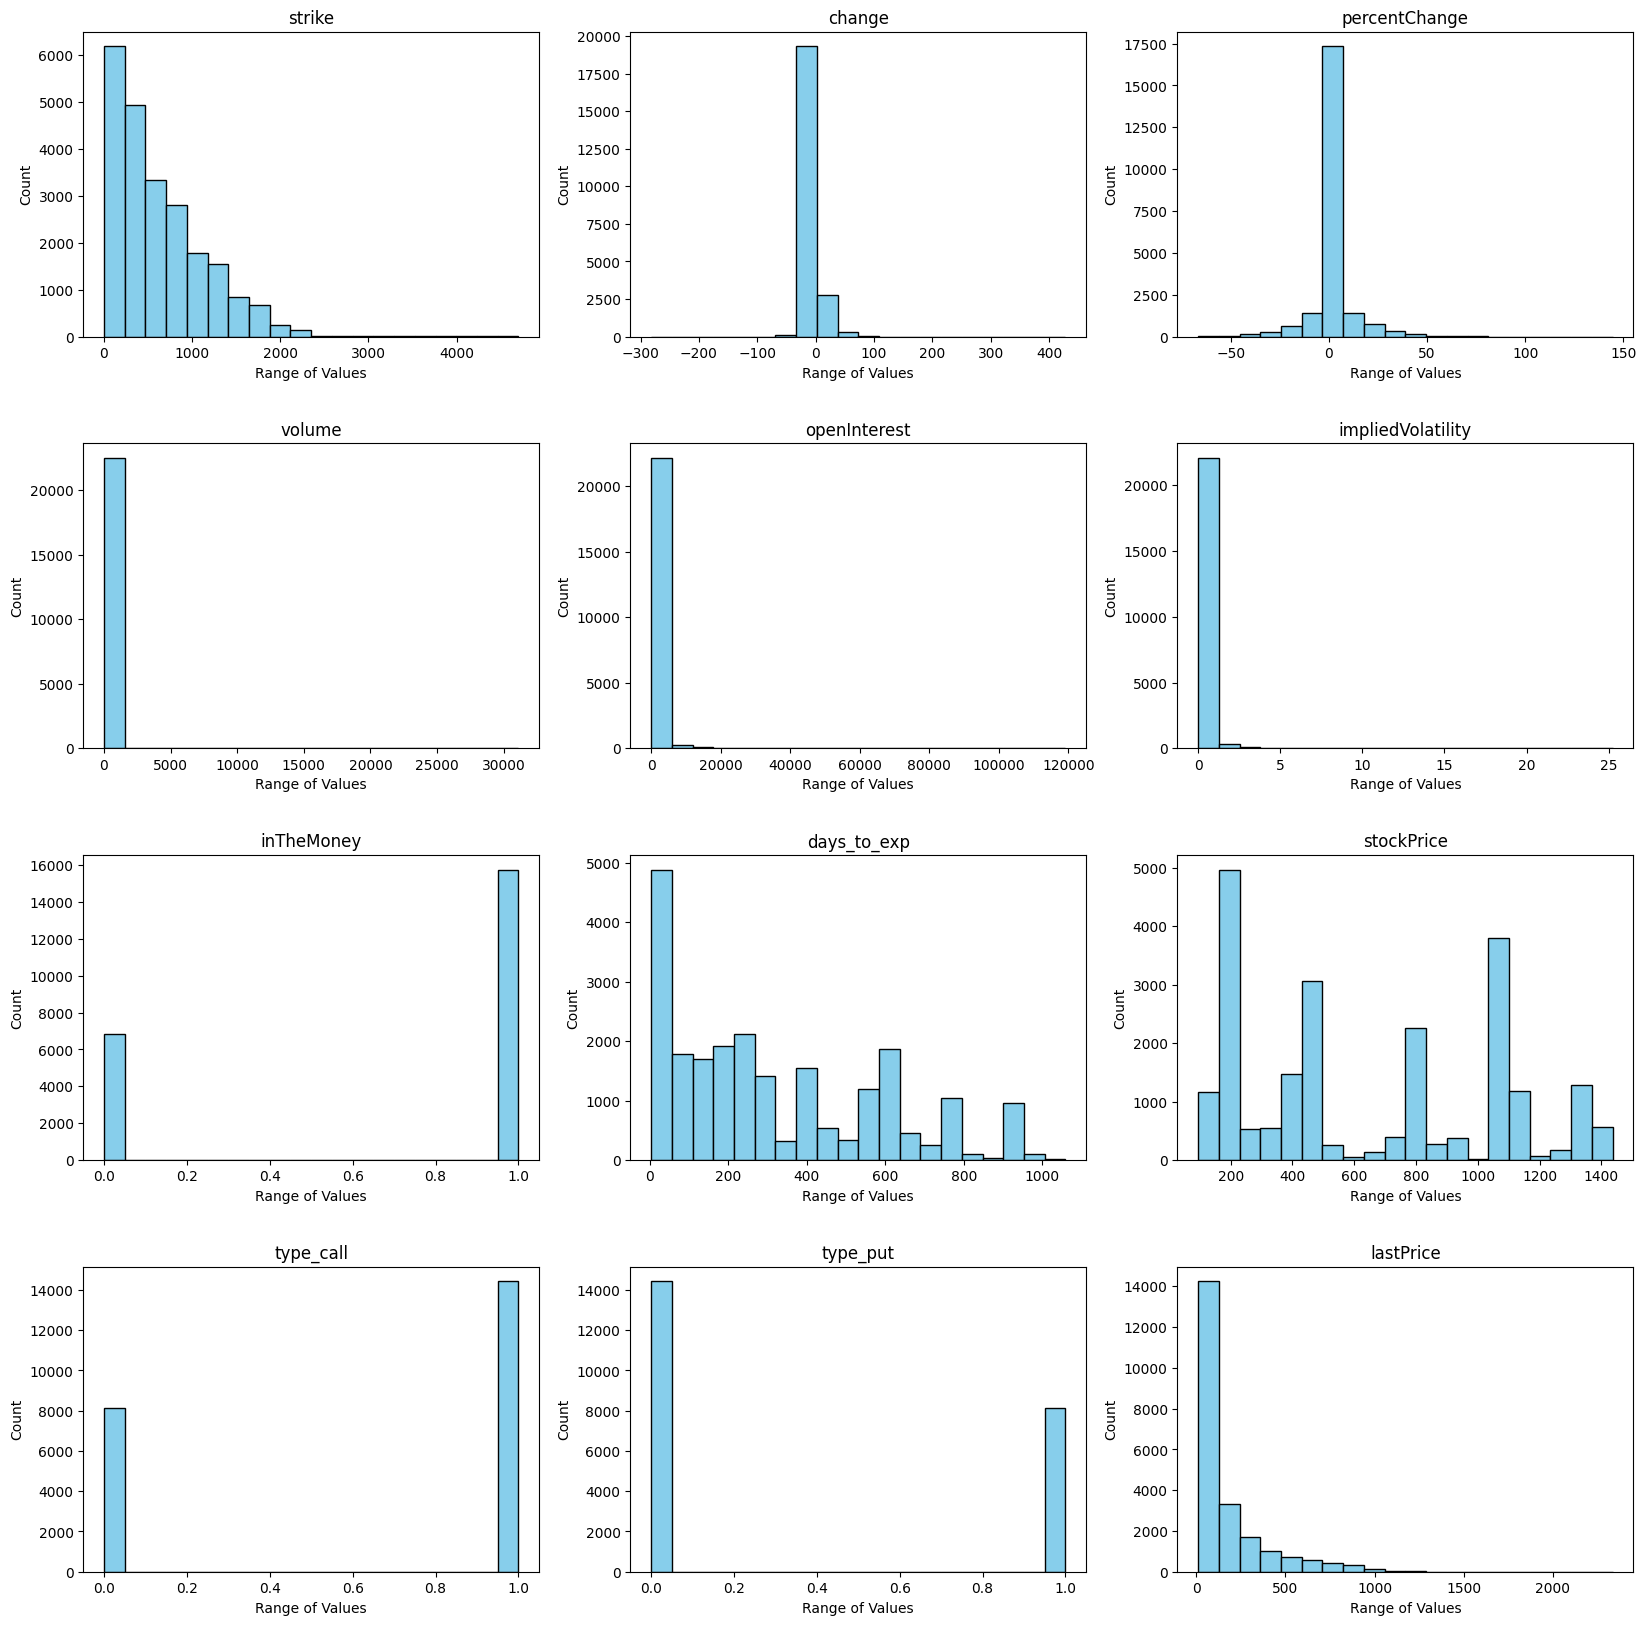

In [9]:
# Histogram plot of features
fig, axes = plt.subplots(4, 3, figsize=(20, 20), gridspec_kw={'hspace': 0.35})

axes_flat = axes.flatten()

for ax, col in zip_longest(axes_flat, df.iloc[:, :].columns):
    if col != None:
        ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f"{col}")
        ax.set_xlabel('Range of Values')
        ax.set_ylabel('Count')
    else:
        ax.axis("off")

plt.show()

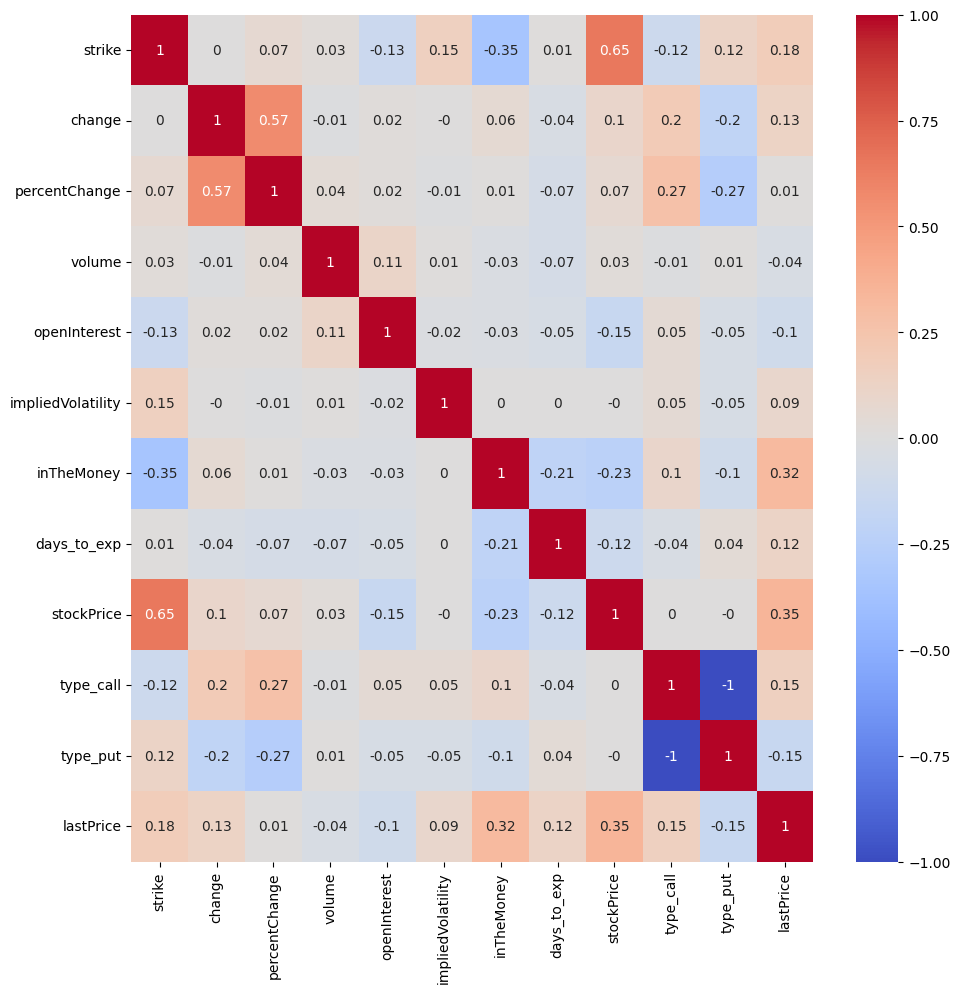

In [10]:
plt.figure(figsize = (11, 11))
sns.heatmap(round(pd.DataFrame(df, columns=df.columns).corr(), 2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22583 entries, 0 to 22582
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   strike             22583 non-null  float64
 1   change             22583 non-null  float64
 2   percentChange      22583 non-null  float64
 3   volume             22583 non-null  float64
 4   openInterest       22583 non-null  float64
 5   impliedVolatility  22583 non-null  float64
 6   inTheMoney         22583 non-null  int32  
 7   days_to_exp        22583 non-null  float64
 8   stockPrice         22583 non-null  float64
 9   type_call          22583 non-null  int32  
 10  type_put           22583 non-null  int32  
 11  lastPrice          22583 non-null  float64
dtypes: float64(9), int32(3)
memory usage: 1.8 MB


In [12]:
# check if any of the column values is null
df[df.isna().any(axis=1)]

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put,lastPrice


bests:
{'clf': GradientBoostingRegressor(), 'clf__max_depth': 4, 'clf__n_estimators': 250}
0.9701050357353672


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.970105
1,GradientBoostingRegressor()_4_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.965563
2,GradientBoostingRegressor()_3_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.940933
3,GradientBoostingRegressor()_3_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.933883
4,GradientBoostingRegressor()_2_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.877018
5,GradientBoostingRegressor()_2_200,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.867205
6,RandomForestRegressor()_4_200,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.758339
7,RandomForestRegressor()_4_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.757604
8,DecisionTreeRegressor()_4,"{'clf': DecisionTreeRegressor(), 'clf__max_dep...",0.723412
9,RandomForestRegressor()_3_250,"{'clf': RandomForestRegressor(), 'clf__max_dep...",0.634033


,idn,params,mean_test_score
0,GradientBoostingRegressor()_4_250,"{'clf': GradientBoostingRegressor(), 'clf__max...",0.970105


model performance:
0.9666960599669041
22.029113821874706
1531.272225176492
39.13147358810414


,Predict,Actual
0,32.463894,22.26
1,18.701867,16.50
2,17.024433,14.26
3,35.461779,26.30
4,339.994817,359.14
...,...,...
5641,59.369983,58.00
5642,47.172135,17.95
5643,66.421628,62.20
5644,31.381393,16.00


 98%|===================| 5559/5646 [00:40<00:00]        

shap summary plots


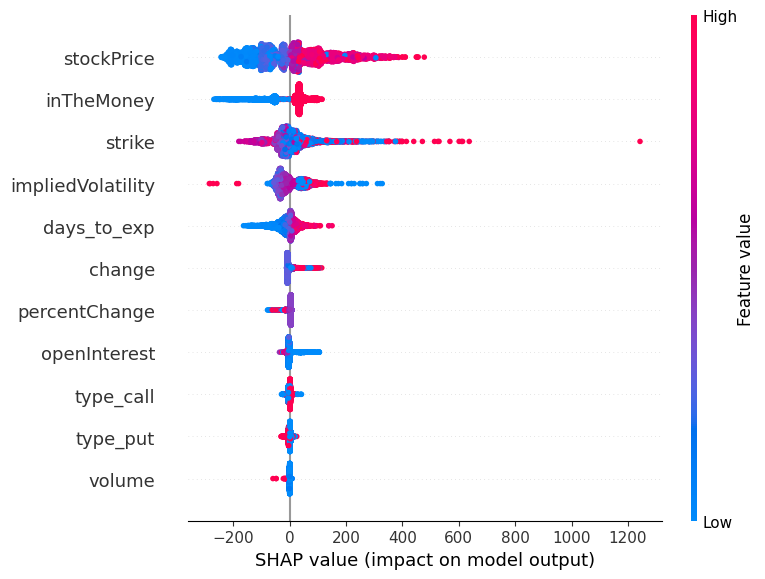

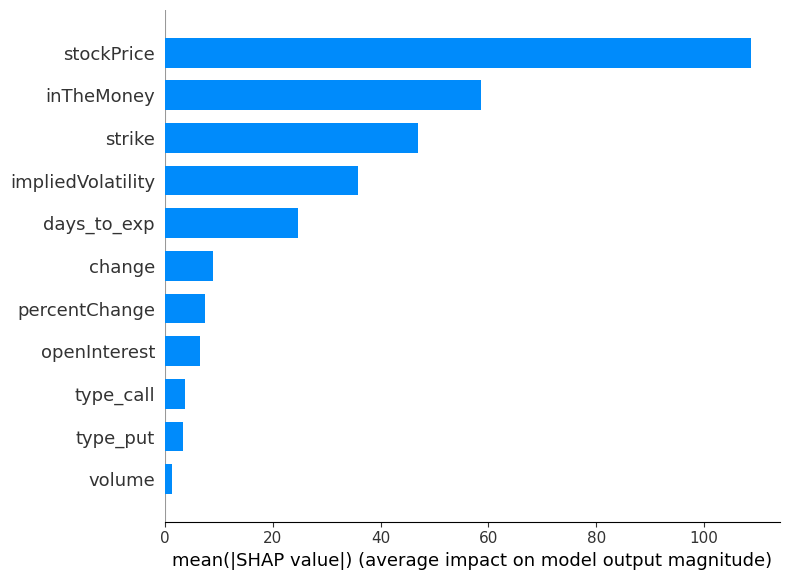

Top 5 features - shap values vs. feature values


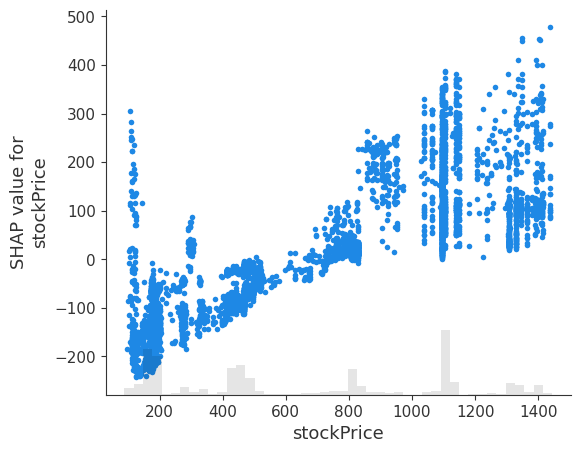

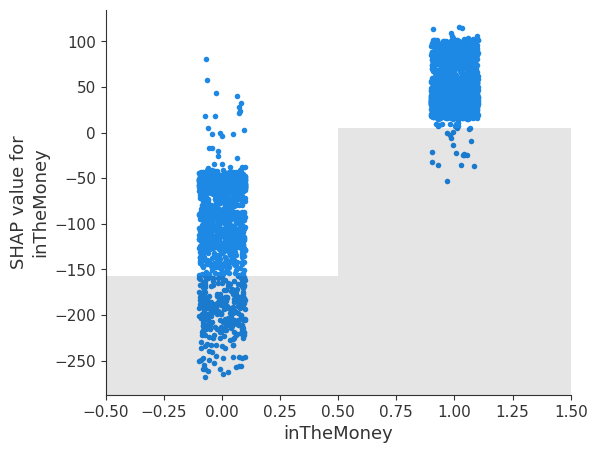

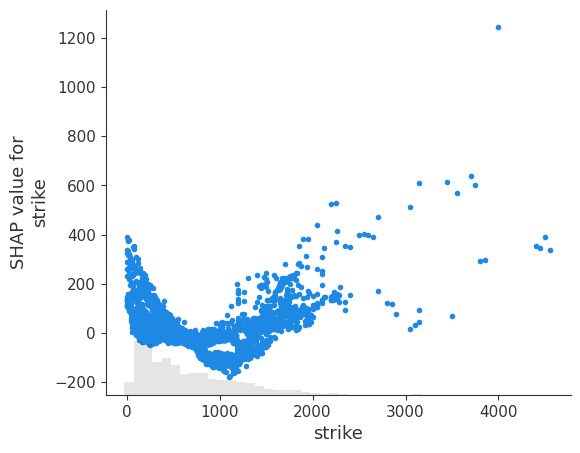

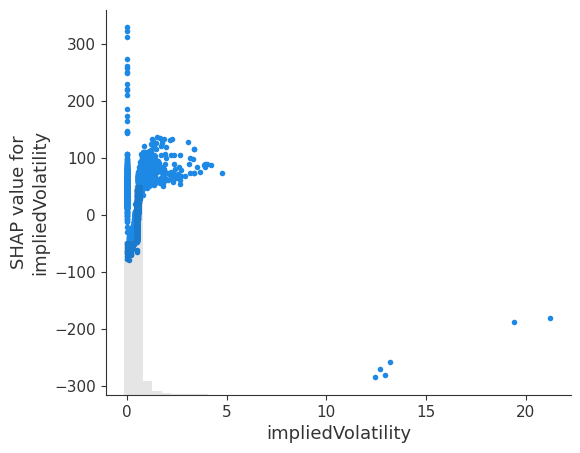

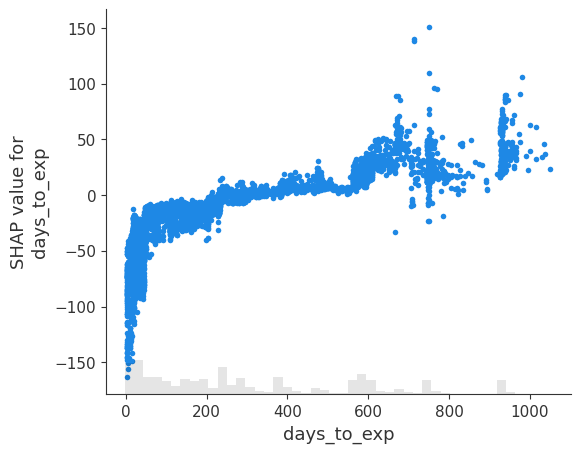

In [13]:
X_test, y_test, shap_values, X, shap_explainer, bm = train_model(df)

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
19561,700.0,-4.09,-15.521821,14.0,2091.0,0.470937,0,290.29,1096.33,0,1


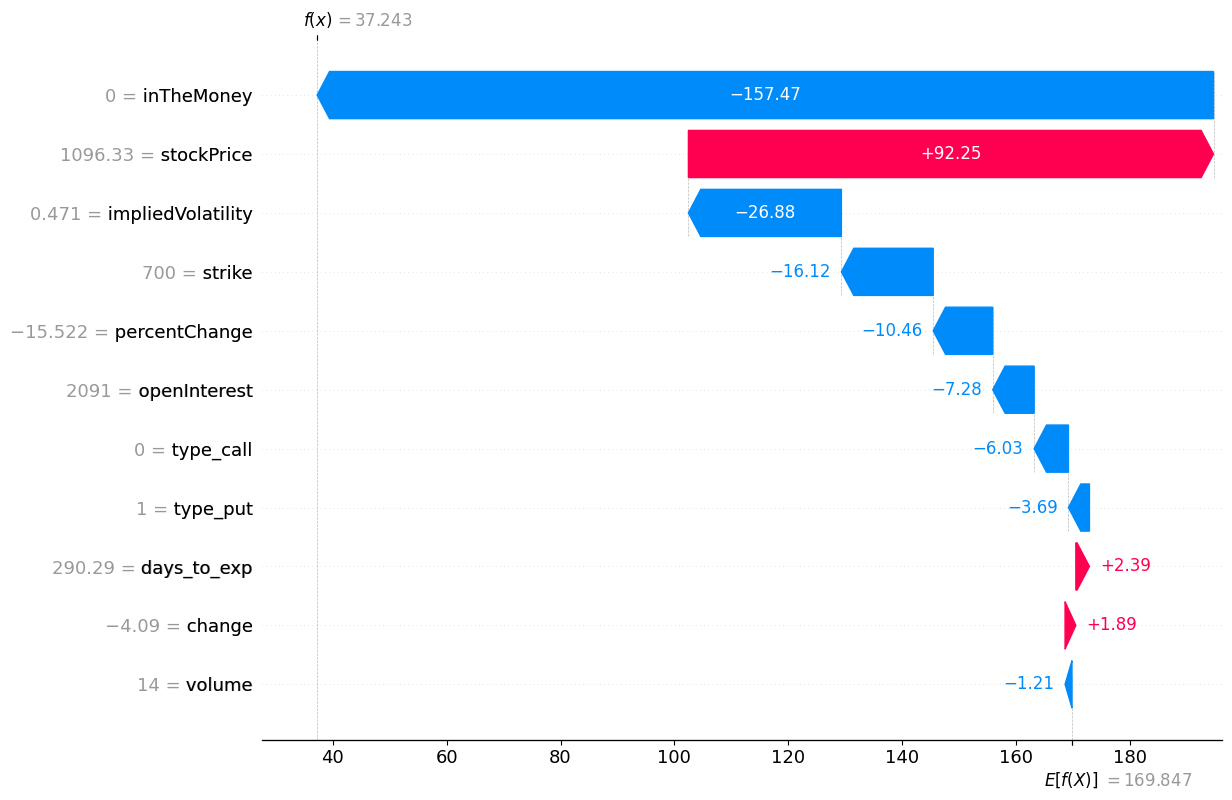

predict
37.243155405910976
actual
22.26


In [14]:
view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 0)

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
16210,450.0,-1.5,-8.333333,30.0,3002.0,0.256172,0,199.28,415.13,1,0


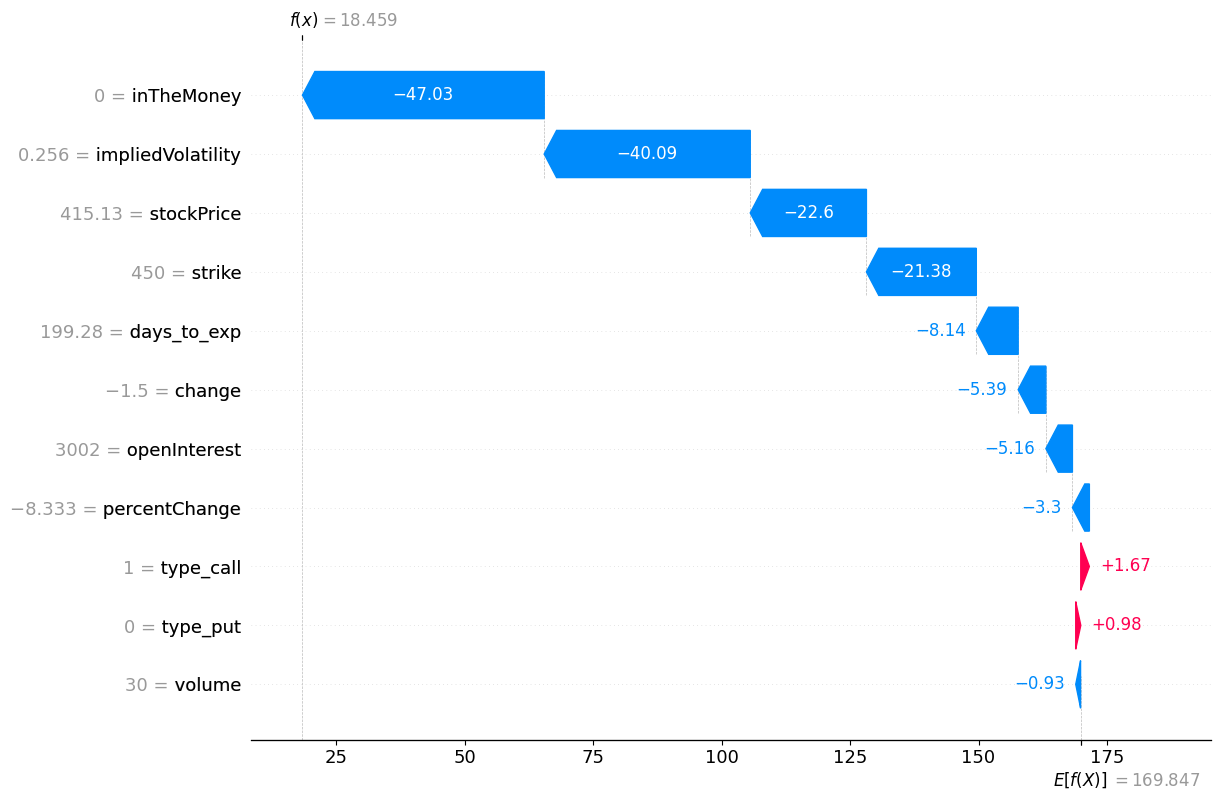

predict
18.459158367529707
actual
16.5


In [15]:
view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 1)

,strike,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,days_to_exp,stockPrice,type_call,type_put
8607,155.0,0.0,0.0,4.0,3222.0,0.139962,1,387.27,144.38,0,1


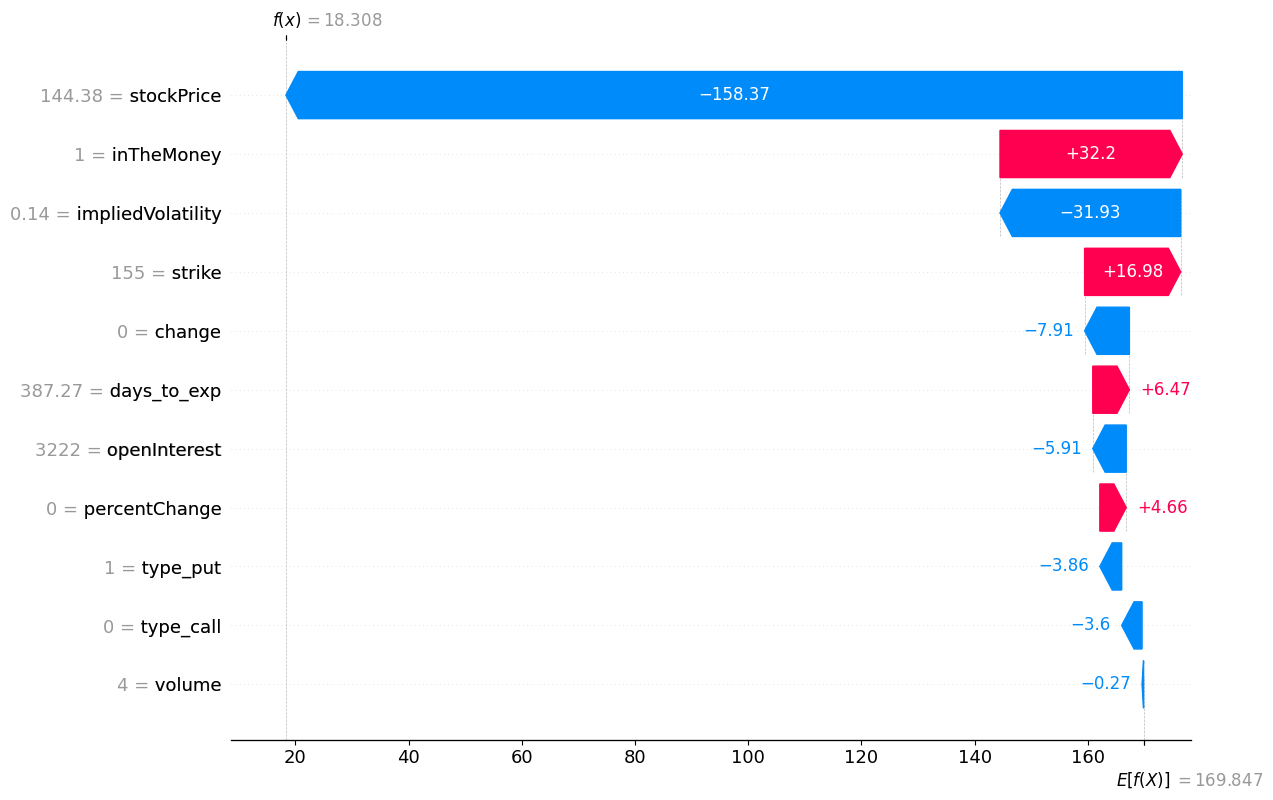

predict
18.308253101684613
actual
14.26


In [16]:
view_shap_value_for_instance(X_test, y_test, shap_values, X, shap_explainer, bm, 2)